# Plot the feature importance from the Logistic Regression model

In [4]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

with open('numeric_columns.pickle', 'rb') as f:  
    nu_cols = pickle.load(f)

In [6]:
# load final model
with open('./results/2021_final_LR_model.pickle', 'rb') as picklefile:  
        logistic_model_final = pickle.load(picklefile)

In [10]:
# grab a pandas dataframe of the data from step 1 to get the feature names 
with open('./complete5.pickle', 'rb') as f:
        dataset = pickle.load(f)
feats = dataset.iloc[0:1,:]
ff = feats.drop(columns=['usrds_id','subset','died_in_90','impnum']).copy()
ff = ff.columns
ff = np.array(ff)

In [11]:
def get_most_important_features(r, model, n=5):

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, r[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [12]:
importance = get_most_important_features(ff, logistic_model_final, 20)
importance

{0: {'tops': [(0.061290827714118645, 'como_htn_2.0'),
   (0.06321524556061506, 'patinformed_2.0'),
   (0.06805699162242364, 'hispanic_2.0'),
   (0.07003767351050381, 'race_1.0'),
   (0.07597390377492767, 'prior_hh_care'),
   (0.07601736487064886, 'typtrn_3.0'),
   (0.07723981684878611, 'avfmaturing_2.0'),
   (0.0988468092906853, 'wasna_weight'),
   (0.10988009779602281, 'dietcare_2.0'),
   (0.11579619767199734, 'trcert_nan'),
   (0.1170796860800267, 'accesstype_nan'),
   (0.1202220267321587, 'disgrpc_6.0'),
   (0.14541424184206928, 'prior_sn_care'),
   (0.1506381696084268, 'gfr_epi'),
   (0.15643030730009827, 'epo_9.0'),
   (0.18395763827142345, 'dietcare_9.0'),
   (0.22723668874424388, 'prior_ip_care'),
   (0.2286510212823167, 'nephcare_nan'),
   (0.5049971681447901, 'inc_age'),
   (1.0108648726225204, 'prior_hs_care')],
  'bottom': [(-0.06000591053731134, 'como_chf_2.0'),
   (-0.06275920861405501, 'nephcarerange_2.0'),
   (-0.06562813051347575, 'como_htn_1.0'),
   (-0.066397916206726

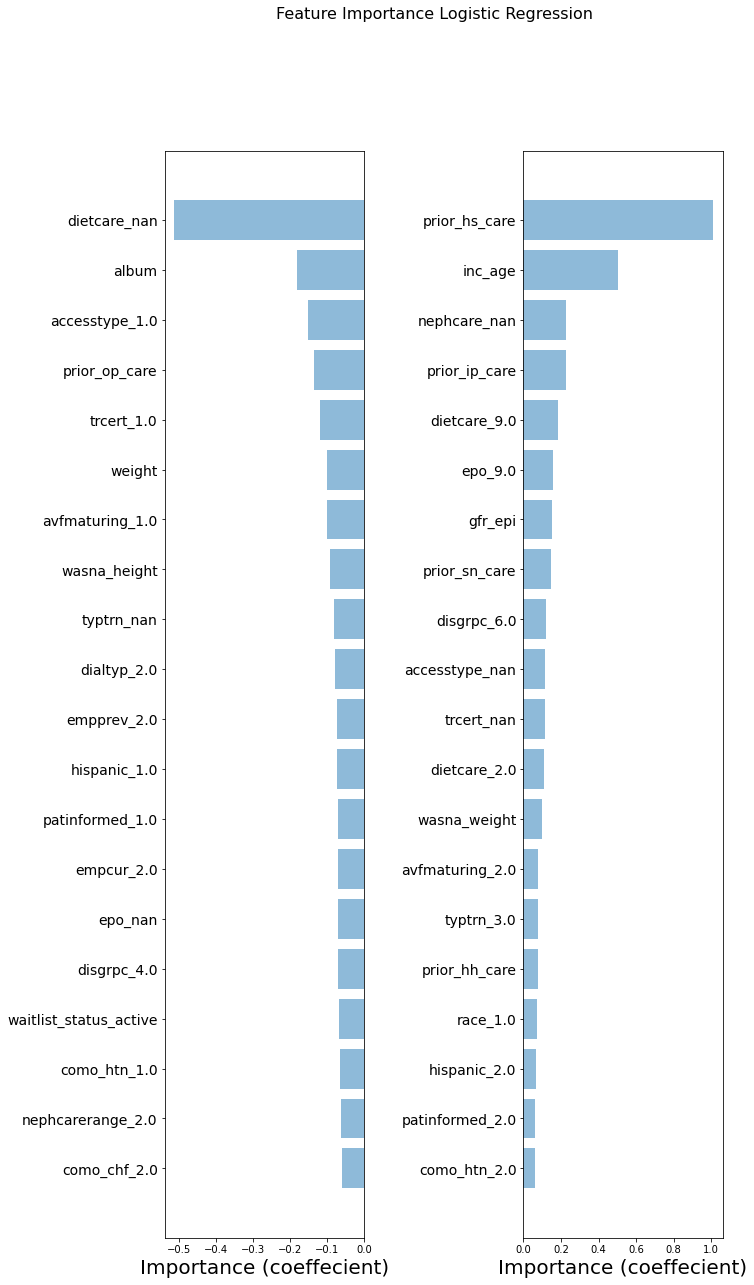

In [17]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 20))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, alpha=0.5)
    #plt.title('Survived', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance (coeffecient)', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores,  alpha=0.5)
    #plt.title('Died in 90 Days', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance (coeffecient)', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.savefig("2021_top_bottom_plot.svg")
    plt.show()

top_scores_p = [a[0] for a in importance[0]['tops']]#[20:-1]
top_words_p = [a[1] for a in importance[0]['tops']]#[20:-1]
bottom_scores_p = [a[0] for a in importance[0]['bottom']]#[20:-1]
bottom_words_p = [a[1] for a in importance[0]['bottom']]#[20:-1]

plot_important_words(top_scores_p, top_words_p, 
                     bottom_scores_p, bottom_words_p, 
                     "Feature Importance Logistic Regression")

In [14]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

In [15]:
top_coef = pd.DataFrame(columns=['vocab','coef'])
top_coef['coef'] = top_scores + bottom_scores

In [16]:
top_coef = top_coef.sort_values(by='coef',axis=0,ascending=False)
top_coef.to_csv('./results/2021_top_log_regression_coef_20.csv')